# Apple Twitter Sentiment Analysis

## Business Understanding


###  Project Overview
Apple and Google are two of the biggest technology companies, constantly competing in markets such as smartphones, laptops, cloud services, and operating systems. Customer perception of their products is critical to their success, as sentiment expressed on social media platforms like Twitter can influence brand reputation, stock prices, and customer purchasing decisions.
This project focuses on sentiment analysis of Apple-related tweets using the Apple Twitter Sentiment Dataset. The primary goal is to develop an NLP model that classifies tweets into sentiment categories using deep learning techniques like CNNs and RNNs (LSTM/GRU). By analyzing sentiment trends, the project aims to understand public perception of Apple and its products, compare machine learning and deep learning models for sentiment classification, improve classification accuracy through advanced preprocessing and feature engineering techniques, and provide business insights to support marketing strategies, brand management, and product development. The project follows a structured workflow, including data exploration, preprocessing, feature extraction, model training, evaluation, and interpretability, ensuring a robust and reproducible sentiment analysis system.

### Business Problem
The challenge is to automate the classification of Twitter sentiment regarding Apple and Google products.
By developing a sentiment analysis model, businesses can monitor public perception, identify customer concerns, and adjust their marketing or product development strategies accordingly.

### **Objective** 
#### Main
- To develop a deep learning-based sentiment classification model for Apple-related tweets using CNNs and RNNs (LSTM/GRU) to analyze public sentiment and trends, compare model performance, and extract actionable business insights.  

#### Specific Objectives
- To understand the dataset structure, including key columns, missing values, and data distribution.  
- To identify and preprocess sentiment labels, refining them for better classification.  
- To analyze sentiment confidence scores and their distribution across tweets.  
- To explore tweet characteristics such as length, common words, and hashtags.  
- To compare traditional machine learning models with deep learning approaches to determine the best-performing method.  
- To enhance model performance through feature extraction techniques like TF-IDF, data balancing strategies, and hyperparameter tuning.  
- To extract sentiment trends related to Apple to support marketing, brand management, and product development decisions.  
- To ensure model reproducibility by documenting the process in a Jupyter Notebook, storing code in a GitHub repository, and presenting findings in a non-technical presentation.  


### Why Machine Learning and Deep Learning?
- To build an accurate and scalable sentiment analysis model, we will leverage both traditional machine learning (ML) models and deep learning (DL) techniques.
- Each approach has unique strengths, and comparing them will help us determine the most effective method for classifying sentiment in tweets.


### Key Stakeholders
The primary stakeholders for this project are Apple’s Product, Marketing, and Customer Experience Teams, who rely on customer sentiment analysis to drive strategic decisions. 
Other relevant stakeholders include:

- Marketing & Branding Team: To design targeted campaigns based on sentiment trends and customer feedback.

- Product Development Team: To identify product-related concerns, improve features, and enhance user experience based on sentiment insights.

- Customer Support Team: To proactively address negative sentiment and improve customer satisfaction by resolving issues efficiently.

- Executive Leadership: To make data-driven business decisions regarding Apple’s brand perception, customer engagement, and future innovations.


### Success Metrics
- Model Performance: The model’s effectiveness will be measured using accuracy, precision, recall, F1-score, and AUC-ROC to ensure reliable sentiment classification.

- Business Impact: Improved ability for Apple’s product and marketing teams to track customer sentiment in real-time, leading to better-informed product decisions and marketing strategies.

- Scalability & Efficiency: The sentiment analysis system should be able to process large volumes of tweets efficiently, providing real-time insights into customer perception.

- Cost-Effectiveness: By automating sentiment analysis, Apple can reduce manual effort, minimize human bias, and make data-driven decisions faster, leading to better customer engagement strategies with optimized marketing and product development investments.

### Technologies used
- Python-Jupyter notebook
- Pandas
- Numpy
- NLTK
- TF- IDF
- Word Embeddings (Word2Vec, GloVe)
- Scikit-Learn

## **Data Understanding**
The dataset consists of **3886 tweets**, each labeled with sentiment and sentiment confidence scores.

### **Sentiment Distribution**
- **Neutral (3)**: 2162 tweets (Largest class)
- **Negative (1)**: 1219 tweets
- **Positive (5)**: 423 tweets
- **Not Relevant**: 82 tweets
- **Observation**: The dataset is **imbalanced**, with more neutral and negative tweets.

### **Sentiment Confidence Scores**
- The scores range from **0.3 to 1.0**.
- **Peaks at 0.7 and 1.0**, indicating varying label reliability.
- **High-confidence labels** can be prioritized for training to improve model accuracy.

### **Tweet Length Distribution**
- Most tweets are **between 100 and 140 characters**.
- A **longer tweet length** trend is observed, likely due to detailed opinions or news articles.

### **Handling Missing Values**
- `sentiment_gold`: **Missing in 3783 rows**, making it **unusable**.
- `_last_judgment_at`: **103 missing values**, but **not critical** for modeling.

### **Duplicates**
- **No duplicate tweets** found.

### **Top Hashtags and Words**
- **Top Hashtags**: `#AAPL`, `#Apple`, `#trading`, `#Stocks`, `#iPhone6`.
- **Top Words**: "apple", "aapl", "http", "rt", indicating **frequent mentions of Apple products, financial discussions, and retweets**.

In [47]:
!pip install contractions

In [48]:
!pip install wordcloud

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter  
import re 
import numpy as np
import nltk
from nltk.corpus import stopwords
import contractions
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk import pos_tag
#from gensim.models import Word2Vec
#import spacy

In [50]:
# Load the dataset
df = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", encoding="ISO-8859-1")

In [51]:
# Display the first few rows
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #AppleSnob.
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [52]:
# Check dataset shape
print("Shape:", df.shape)

Shape: (3886, 12)


In [53]:
# Check the unique values
df.nunique()

_unit_id                3886
_golden                    2
_unit_state                2
_trusted_judgments        19
_last_judgment_at        388
sentiment                  4
sentiment:confidence     654
date                    3795
id                         3
query                      1
sentiment_gold             9
text                    3219
dtype: int64

In [54]:
df['sentiment'].value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

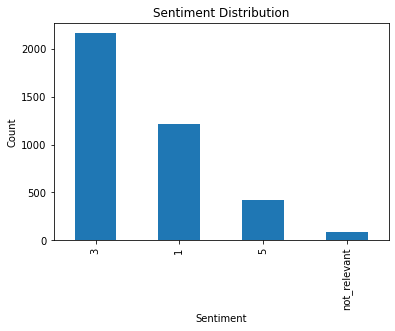

In [55]:
# Count sentiment labels
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [56]:
# Set column width to display full tweets
pd.options.display.max_colwidth = None  

# Display sample tweets for each sentiment category
for sentiment_value in df['sentiment'].unique():
    print(f"Sentiment: {sentiment_value}")
    print(df[df['sentiment'] == sentiment_value]['text'].sample(3, random_state=42).to_string(index=False))
    print("\n" + "="*80 + "\n")


Sentiment: 3
                     Photographing the White House Christmas Decorations With an iPhone 6 by @BrooksKraftFoto  @apple http://t.co/lPDqbJqnV5
             #Apple Wants To Make Your Commute Much Easier, According To This New Patent #aapl http://t.co/fKMNHCmwJU http://t.co/wdqAzQowt3
 RT @OneRepublic: Studio at 45,000 ft.  One outlet,  4 computers.  @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET


Sentiment: 5
                                @MhDaDon @Apple def gotta have it, I don't even like watches
 fun..fun nights..Post birthday celebration of rfrancoben and @apple. http://t.co/maRHLxgV0F
                                          I'm really enjoying GarageBand. @apple #GarageBand


Sentiment: 1
 RT @OneRepublic: Studio at 45,000 ft.  One outlet,  4 computers.  @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET
        How is 'never' interpreted as 'ask me again annoyingly soon' when iOS apps ask to be rated?  @apple tell y

- Sentiment 3 (Neutral/Mixed): News articles, patents, and general discussions without strong emotion.

- Sentiment 5 (Positive): Praising Apple products, expressing excitement.

- Sentiment 1 (Negative): Complaints, frustrations, sarcastic remarks.

- Sentiment "not_relevant": Mentions that may not be related to sentiment analysis, such as general Apple mentions in unrelated contexts.

In [57]:
# Check for missing values
df.isnull().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        103
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3783
text                       0
dtype: int64

In [58]:
# Duplicates
df.duplicated().sum()

0

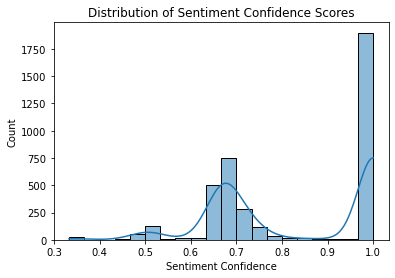

In [59]:
# Distribution of Sentiment Confidence Scores
sns.histplot(df['sentiment:confidence'], bins=20, kde=True)  
plt.xlabel("Sentiment Confidence")  
plt.ylabel("Count")  
plt.title("Distribution of Sentiment Confidence Scores")  
plt.show()


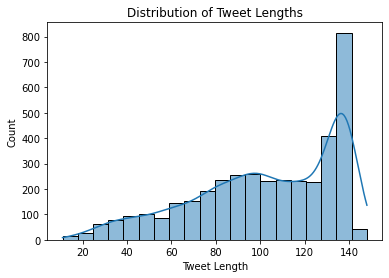

In [60]:
# Tweet Length Distribution
df["tweet_length"] = df["text"].str.len()  

sns.histplot(df["tweet_length"], bins=20, kde=True)  
plt.xlabel("Tweet Length")  
plt.ylabel("Count")  
plt.title("Distribution of Tweet Lengths")  
plt.show()

In [61]:
# Common Words & Hashtags

# Join all tweets into one string  
all_text = " ".join(df["text"].dropna())  

# Extract hashtags  
hashtags = re.findall(r"#\w+", all_text)  
hashtag_counts = Counter(hashtags).most_common(10)  

# Extract words (excluding stopwords & special characters)  
words = re.findall(r"\b\w+\b", all_text.lower())  
word_counts = Counter(words).most_common(10)  

print("Top 10 Hashtags:", hashtag_counts)  
print("Top 10 Words:", word_counts)


Top 10 Hashtags: [('#AAPL', 569), ('#aapl', 466), ('#Apple', 251), ('#DieIn', 152), ('#iPhone', 64), ('#iPhone6', 57), ('#apple', 55), ('#December', 54), ('#trading', 48), ('#Stocks', 39)]
Top 10 Words: [('apple', 3957), ('t', 2597), ('co', 2324), ('http', 2269), ('the', 1701), ('aapl', 1385), ('to', 1053), ('in', 870), ('is', 868), ('rt', 848)]


## Data Cleaning/Text Cleaning

Data Cleaning involved the following 
#### 1. Lowercasing

   -Converting all text to lowercase to ensure uniformity.

#### 2. Removing URLs

   -Eliminating links (http://..., www...) as they don’t contribute to sentiment analysis.

#### 3. Removing Mentions

   -Deleting @username to focus on tweet content rather than tagged users.

#### 4. Removing Hashtags

   -Striping hashtags (#Apple, #iPhone) as they were not be needed for text analysis.

#### 5. Removing Special Characters

   -Keeping only alphanumeric text and spaces, removing punctuation or symbols.

#### 6. Removing Extra Spaces

   -Ensuring there were no unnecessary spaces between words.

#### 7. Removing Stopwords

   -Filtering common words like "the", "is", "and" while keeping negations (not, no, never) to preserve meaning.

#### 8. Handling Duplicates

   -Removing duplicate tweets to avoid bias in the dataset.

#### 9. Saving Cleaned Data

Storing the processed dataset in cleaned_apple_tweets.csv for further analysis.


In [62]:
df.head(20)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text,tweet_length
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,65
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,94
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #AppleSnob.,51
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",136
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL,44
5,623495518,True,golden,13,NaN,3,0.5975,Mon Dec 01 20:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS,88
6,623495519,True,golden,13,NaN,5,0.8468,Mon Dec 01 20:32:45 +0000 2014,5.400000e+17,#AAPL OR @Apple,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB,61
7,623495520,True,golden,9,NaN,5,0.6736,Mon Dec 01 20:34:31 +0000 2014,5.400000e+17,#AAPL OR @Apple,5\n3,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK,75
8,623495521,True,golden,15,NaN,3,0.7997,Mon Dec 01 20:36:47 +0000 2014,5.400000e+17,#AAPL OR @Apple,1,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL,74
9,623495522,False,finalized,3,12/12/14 0:52,3,0.6360,Mon Dec 01 20:45:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd,101


In [63]:
#Extracting just the important columns needed for this analysis
#that is, sentiment and text

df = df[["date" , "sentiment:confidence", 'sentiment', 'text']] 
df.head(10)

,date,sentiment:confidence,sentiment,text
0,Mon Dec 01 19:30:03 +0000 2014,0.6264,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx
1,Mon Dec 01 19:43:51 +0000 2014,0.8129,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9
2,Mon Dec 01 19:50:28 +0000 2014,1.0000,3,My cat only chews @apple cords. Such an #AppleSnob.
3,Mon Dec 01 20:26:34 +0000 2014,0.5848,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see"
4,Mon Dec 01 20:29:33 +0000 2014,0.6474,3,Nobody expects the Spanish Inquisition #AAPL
5,Mon Dec 01 20:30:03 +0000 2014,0.5975,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS
6,Mon Dec 01 20:32:45 +0000 2014,0.8468,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB
7,Mon Dec 01 20:34:31 +0000 2014,0.6736,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK
8,Mon Dec 01 20:36:47 +0000 2014,0.7997,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL
9,Mon Dec 01 20:45:03 +0000 2014,0.6360,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd


In [64]:
#checking null values
df.isnull().sum()

date                    0
sentiment:confidence    0
sentiment               0
text                    0
dtype: int64

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


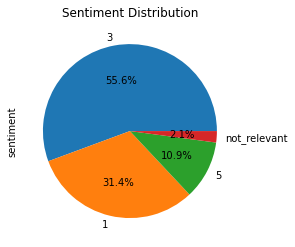

In [65]:
#checking value count in sentiment column
print(df.sentiment.value_counts())
print(df.sentiment.value_counts().plot(kind='pie', title="Sentiment Distribution", autopct='%1.1f%%'));


In [66]:
#removing unnecessary row not_relevant because it does not contribute to the analysis
df = df[df['sentiment'] != 'not_relevant']
print(df.sentiment.unique())

['3' '5' '1']


In [67]:
#checking duplicates
print(df.duplicated().sum())
duplicates = df[df.duplicated(subset=["text"], keep=False)]
print(duplicates)




4
                                date  sentiment:confidence sentiment  \
29    Tue Dec 02 00:15:26 +0000 2014                1.0000         3   
32    Tue Dec 02 00:16:27 +0000 2014                0.6604         3   
34    Tue Dec 02 00:18:59 +0000 2014                0.6515         3   
38    Tue Dec 02 00:24:26 +0000 2014                1.0000         3   
42    Tue Dec 02 00:27:36 +0000 2014                1.0000         3   
...                              ...                   ...       ...   
3852  Tue Dec 09 21:12:55 +0000 2014                0.7325         3   
3854  Tue Dec 09 21:14:04 +0000 2014                1.0000         1   
3855  Tue Dec 09 21:17:24 +0000 2014                0.6785         1   
3878  Tue Dec 09 21:24:22 +0000 2014                0.6839         5   
3885  Tue Dec 09 09:01:25 +0000 2014                0.8938         5   

                                                                                                                                     

In [68]:
#checking duplicates
df[df.duplicated()]

,date,sentiment:confidence,sentiment,text
1437,Thu Dec 04 20:39:48 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
1445,Thu Dec 04 20:39:55 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
1449,Thu Dec 04 20:39:58 +0000 2014,1.0,3,"RT @OneRepublic: Studio at 45,000 ft. One outlet, 4 computers. @Apple we need the batteries of the future NoW!!!! http://t.co/astp9x6KET"
2511,Sat Dec 06 18:46:30 +0000 2014,1.0,1,"NO @apple NO! When I make an I phone Album I WANT IT TO STAY ON PHONE, not be removed when camera roll cleared.. GET IT TOGETHER!"


##### There were are no duplicates just retweets

In [69]:
#convert date to date_time format 
#convert sentiment to integer
print(df.info())

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['sentiment'] = df['sentiment'].fillna(99).astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  3804 non-null   object 
 1   sentiment:confidence  3804 non-null   float64
 2   sentiment             3804 non-null   object 
 3   text                  3804 non-null   object 
dtypes: float64(1), object(3)
memory usage: 148.6+ KB
None


##### Defining the text cleaning function 

In [70]:
# Ensuring stopwords are available
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english")) - {"not", "no", "never"}  # Keep negations

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
# Define text cleaning function
def clean_text(text):
    # Convert to lowercase. Converting all text to lowercase to ensure uniformity.
    text = text.lower().strip()  
    # Expand contractions
    text = contractions.fix(text)
    # Eliminating links (http://..., www...) as they don’t contribute to sentiment analysis.
    text = re.sub(r"http\S+|www\S+", "", text) 
    # Deleting @username to focus on tweet content rather than tagged users.
    text = re.sub(r"@\w+", "", text)  
    # Striping hashtags (#Apple, #iPhone) as they were not be needed for text analysis.
    text = re.sub(r"#[A-Za-z0-9]+", "", text)  
    # Keeping only alphanumeric text and spaces, removing punctuation or symbols.
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)  
    # Ensuring there were no unnecessary spaces between words.
    text = re.sub(r"\s+", " ", text) 
    #Filtering common words like "the", "is", "and" while keeping negations (not, no, never) to preserve meaning.
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

In [72]:
# Apply cleaning to tweets
df["cleaned_text"] = df["text"].apply(clean_text)

In [73]:
# Save cleaned dataset
#cleaned_file_path = r"D:\Deep Learning\cleaned_apple_tweets.csv"

#df.to_csv(cleaned_file_path, index=False)

#print(f"Cleaned dataset saved to: {cleaned_file_path}")

In [74]:
#df1 = pd.read_csv("D:/Deep Learning/cleaned_apple_tweets.csv")
df.head(50)

,date,sentiment:confidence,sentiment,text,cleaned_text
0,2014-12-01 19:30:03+00:00,0.6264,3,#AAPL:The 10 best Steve Jobs emails ever...http://t.co/82G1kL94tx,10 best steve jobs emails ever
1,2014-12-01 19:43:51+00:00,0.8129,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl\nhttp://t.co/hGFcjYa0E9,rt aapl stock miniflash crash today aapl
2,2014-12-01 19:50:28+00:00,1.0000,3,My cat only chews @apple cords. Such an #AppleSnob.,cat chews cords
3,2014-12-01 20:26:34+00:00,0.5848,3,"I agree with @jimcramer that the #IndividualInvestor should own not trade #Apple #AAPL, it's extended so today's pullback is good to see",agree not trade extended todays pullback good see
4,2014-12-01 20:29:33+00:00,0.6474,3,Nobody expects the Spanish Inquisition #AAPL,nobody expects spanish inquisition
5,2014-12-01 20:30:03+00:00,0.5975,3,#AAPL:5 Rocket Stocks to Buy for December Gains: Apple and More...http://t.co/eG5XhXdLLS,5 rocket stocks buy december gains apple
6,2014-12-01 20:32:45+00:00,0.8468,5,Top 3 all @Apple #tablets. Damn right! http://t.co/RJiGn2JUuB,top 3 damn right
7,2014-12-01 20:34:31+00:00,0.6736,5,CNBCTV: #Apple's margins better than expected? #aapl http://t.co/7geVrtOGLK,cnbctv margins better expected
8,2014-12-01 20:36:47+00:00,0.7997,3,Apple Inc. Flash Crash: What You Need to Know http://t.co/YJIgtifdAj #AAPL,apple inc flash crash need know
9,2014-12-01 20:45:03+00:00,0.6360,3,#AAPL:This Presentation Shows What Makes The World's Biggest Tech Companies ...http://t.co/qlH9PqSoSd,presentation shows makes worlds biggest tech companies


## Feature Engineering


Feature engineering involves the following 

#### 1. Word and Character Count:

   * Helps understand the length of tweets and its relationship with sentiment.

   * Can be used to filter out unusually short or long tweets, which may be spam or irrelevant.

#### 2. Average Word Length:

   * Aids in understanding the complexity of language used in the tweets.

   * More complex words may indicate formal or technical language, while simpler words might be casual or emotional.

#### 3. Sentiment Scores:

   ######  (a) Polarity: Measures sentiment from -1 (negative) to +1 (positive). Helps in classifying tweets into positive, negative, or neutral categories.

   ##### (b) Subjectivity: Determines how subjective or opinion-based a tweet is. Useful for distinguishing factual statements from personal opinions.

#### 4. Negation Count:

   * Negation words can flip sentiment (e.g., "not happy" means sad), making them crucial for accurate sentiment analysis.

   * Helps models handle cases where sentiment is reversed due to negation.

#### 5. TF-IDF Vectorization:

   * Converts text into numerical features for machine learning models.

   * Gives more importance to unique words while down-weighting common words, improving model performance.

#### 6. Word2Vec Embeddings:

   * Captures the semantic relationships between words.

   * Helps models understand context and word similarities, improving sentiment classification accuracy.

#### 7. Named Entity Recognition (NER):

   * Identifies key entities (e.g., company names, product names, locations) mentioned in tweets.

   * Useful for analyzing brand perception and tracking entities mentioned in different sentiment categories.

In [75]:
# Compute word count, character count, and average word length
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
df["char_count"] = df["cleaned_text"].apply(len)
df["avg_word_length"] = df["char_count"] / df["word_count"]

df[["cleaned_text", "word_count", "char_count", "avg_word_length"]].head(10)

,cleaned_text,word_count,char_count,avg_word_length
0,10 best steve jobs emails ever,6,30,5.000000
1,rt aapl stock miniflash crash today aapl,7,40,5.714286
2,cat chews cords,3,15,5.000000
3,agree not trade extended todays pullback good see,8,49,6.125000
4,nobody expects spanish inquisition,4,34,8.500000
5,5 rocket stocks buy december gains apple,7,40,5.714286
6,top 3 damn right,4,16,4.000000
7,cnbctv margins better expected,4,30,7.500000
8,apple inc flash crash need know,6,31,5.166667
9,presentation shows makes worlds biggest tech companies,7,54,7.714286


In [76]:
filtered_df = df[df["word_count"] > 16]  # Filter rows where avg_word_length > 15
print(filtered_df[["cleaned_text", "word_count", "sentiment"]].head(10))  # Display first 10 rows

                                                                                                     cleaned_text  \
69               force people use vpn built ios8 button not work ffs like want apples nsa data collection service   
98     hate ios 8 capitalizes random words like not want give emphasis stupid word tha sentence get self together   
394               hey love ya lowfi hold music awful would prefer hear tips using apple gear better use hold time   
1164                    11593 dec1 64 one crazy minute w 67m shares ms downgrade market weight amp trim stock 4 3   
1324   could really kick ass iphone 6 battery sucks moldy dick tuesday night worst shit ever last 4 fucking hours   
1388     spent 6000 eur apple iphone 6 camera no longer workstold got water iti not unacceptable customer service   
1391  rt spent 6000 eur apple iphone 6 camera no longer workstold got water iti not unacceptable customer service   
2271               mark words wild away iphone 5c bring back 4 i

In [77]:
# Compute subjectivity using TextBlob
df["subjectivity"] = df["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the first few rows to check the computed subjectivity scores
df[["cleaned_text", "subjectivity", "sentiment", "sentiment:confidence"]].head(10)

,cleaned_text,subjectivity,sentiment,sentiment:confidence
0,10 best steve jobs emails ever,0.300000,3,0.6264
1,rt aapl stock miniflash crash today aapl,0.000000,3,0.8129
2,cat chews cords,0.000000,3,1.0000
3,agree not trade extended todays pullback good see,0.600000,3,0.5848
4,nobody expects spanish inquisition,0.000000,3,0.6474
5,5 rocket stocks buy december gains apple,0.000000,3,0.5975
6,top 3 damn right,0.517857,5,0.8468
7,cnbctv margins better expected,0.450000,5,0.6736
8,apple inc flash crash need know,0.000000,3,0.7997
9,presentation shows makes worlds biggest tech companies,0.000000,3,0.6360


#### **Observations:**

Subjectivity Scores:

* Values range from 0 (objective) to 1 (highly subjective).

* Some tweets have 0.0, indicating factual statements.

* Others, like "agree not trade extended todays pullback good see", have higher subjectivity (0.6), meaning they express opinions rather than facts.

## EDA

### Univariate Analysis

In [78]:
pip install --upgrade pillow wordcloud

Requirement already up-to-date: pillow in c:\users\administrator\anaconda3\anaconda\envs\learn-env\lib\site-packages (10.4.0)Note: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: wordcloud in c:\users\administrator\anaconda3\anaconda\envs\learn-env\lib\site-packages (1.9.4)



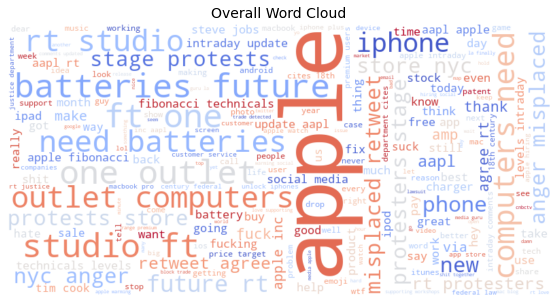

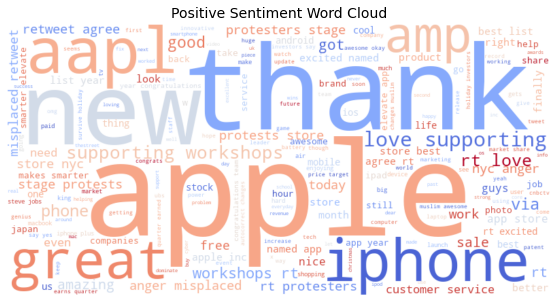

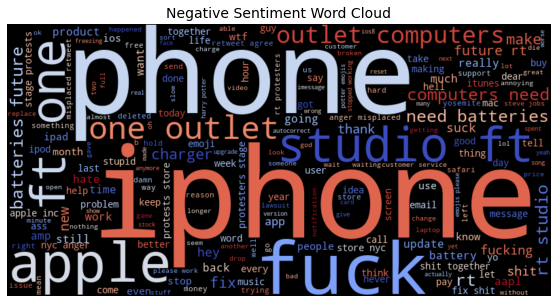

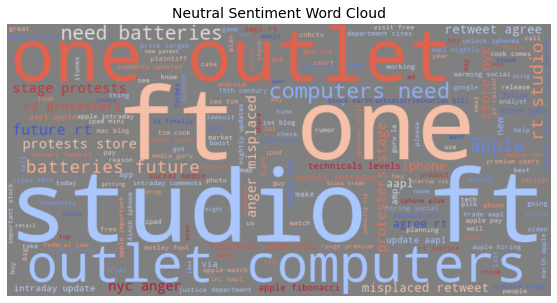

In [79]:
# Function to generate a word cloud
def plot_wordcloud(text, title, color="black"):
    text = " ".join(text.astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color=color, colormap="coolwarm").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

### 🔹 1. Overall Word Cloud
plot_wordcloud(df["cleaned_text"], "Overall Word Cloud", color="white")

### 🔹 2. Sentiment-Specific Word Clouds
# Positive Tweets
plot_wordcloud(df[df["sentiment"] == 5]["cleaned_text"], "Positive Sentiment Word Cloud", color="white")

# Negative Tweets
plot_wordcloud(df[df["sentiment"] == 1]["cleaned_text"], "Negative Sentiment Word Cloud", color="black")

# Neutral Tweets
plot_wordcloud(df[df["sentiment"] == 3]["cleaned_text"], "Neutral Sentiment Word Cloud", color="gray")


##### Observations
Overall Word cloud: 
* A mix of positive and negative words related to Apple products, such as "batteries," "studio," "protests," and "future." Some dissatisfaction is apparent (e.g., "misplaced," "anger"), but general topics include technology and Apple-related issues.

Positive Word Cloud: 
* More positive sentiment with words like "thank," "new," "great," and "love." This suggests that many users are expressing appreciation for Apple products or services.

Negative Word Cloud:
* More negative sentiment, with words like "fuck," "suck," and "fix." This cloud highlights frustration with Apple, possibly related to product issues or customer service complaints.

Neutral Word Cloud:
* A more neutral cloud focusing on keywords like "studio," "outlet," "computers," and "batteries." This indicates general discussions about Apple products without a strong emotional tone.

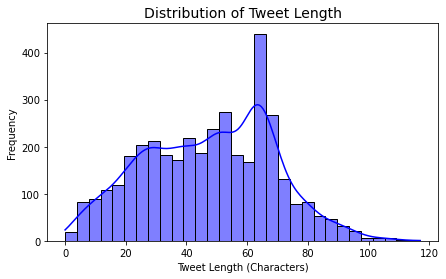

In [80]:
# Character Length Distribution
plt.figure(figsize=(7, 4))
sns.histplot(df["char_count"], bins=30, kde=True, color="blue")
plt.title("Distribution of Tweet Length", fontsize=14)
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.show()

* It ranges between 60- 70 characters


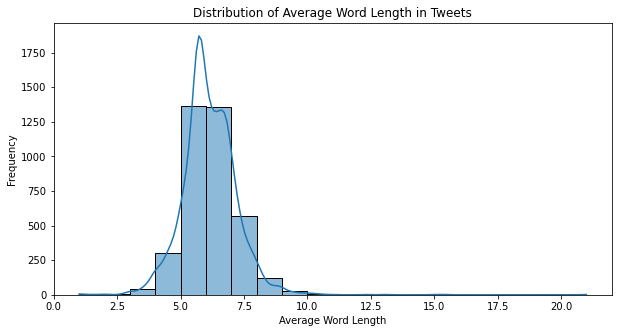

In [86]:
# Histogram for average word length
plt.figure(figsize=(10,5))
sns.histplot(df["avg_word_length"], bins=20, kde=True)
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Average Word Length in Tweets")
plt.show()

* The average word length is mostly around 5-7 characters, indicating that most words in the dataset are relatively short.

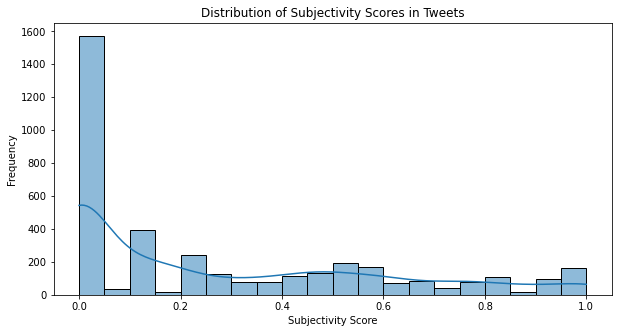

In [87]:
# Histogram for subjectivity scores
plt.figure(figsize=(10,5))
sns.histplot(df["subjectivity"], bins=20, kde=True)
plt.xlabel("Subjectivity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Subjectivity Scores in Tweets")
plt.show()

This plot reveals that:

- Most tweets are objective → Subjectivity scores close to 0
- Only a smaller portion are strongly opinionated → Scores near 1
- That suggests many tweets are news, updates, or factual statements rather than personal opinions—useful insight for understanding tone on social media

### Bivariate Analysis

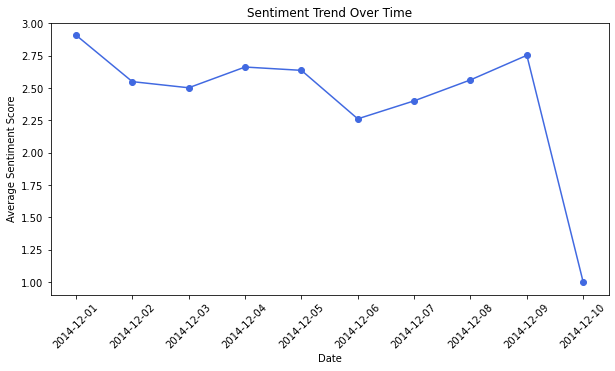

In [88]:
#Sentiment distribution over time
#Group by date and calculate the mean sentiment
sentiment_trend = df.groupby(df['date'].dt.date)['sentiment'].mean()

#Plot
plt.figure(figsize=(10, 5))
sentiment_trend.plot(marker="o", color="royalblue")

#Labels and title
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend Over Time")

#Show plot
plt.xticks(rotation=45)
plt.show()

#### Observations
* The average sentiment score fluctuates over time, indicating variation in user sentiment.

* The sentiment starts high (~3.0) on December 1, 2014, then slightly declines but remains around 2.5 - 2.7 until December 8.

* A sharp drop in sentiment occurs on December 10, 2014, reaching 1.0. This could be due to a significant event or a higher volume of negative tweets on that day.

* The peak on December 8 suggests a temporary increase in positive sentiment before the decline.

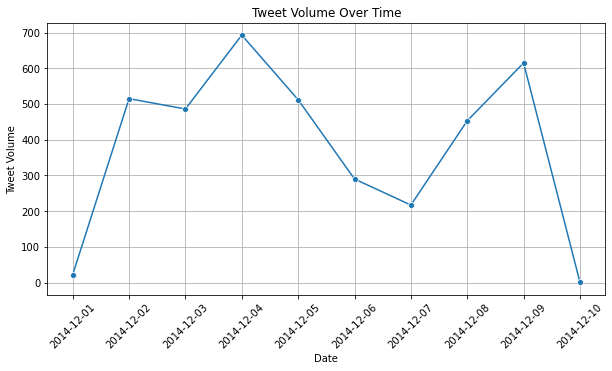

In [103]:
#tweet volume per day
#Count tweets per day
tweet_counts = df.groupby(df['date'].dt.date).size()

#Plot tweet volume over time
plt.figure(figsize=(10,5))
sns.lineplot(x=tweet_counts.index, y=tweet_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Tweet Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Observations
- This confirms that the drastic drop in sentiment on December 10 is likely due to a sharp decrease in tweet volume rather than a genuine sentiment shift. 


- This could indicate missing data or a lack of engagement rather than a sentiment anomaly.

In [97]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [98]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def count_pos_tags(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    

# Count different POS categories
noun_count = sum(1 for _, tag in pos_tags if tag.startswith("NN"))  # Nouns
verb_count = sum(1 for _, tag in pos_tags if tag.startswith("VB"))  # Verbs
adj_count = sum(1 for _, tag in pos_tags if tag.startswith("JJ"))   # Adjectives
adv_count = sum(1 for _, tag in pos_tags if tag.startswith("RB"))   # Adverbs

return pd.Series([noun_count, verb_count, adj_count, adv_count])


NameError: name 'pos_tags' is not defined

In [99]:
df.columns

Index(['date', 'sentiment:confidence', 'sentiment', 'text', 'cleaned_text',
       'word_count', 'char_count', 'avg_word_length', 'subjectivity'],
      dtype='object')

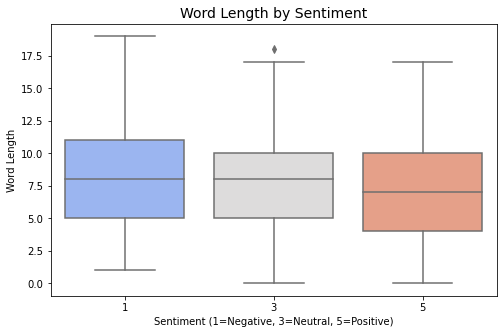

In [101]:
# Sentiment vs. word count
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["sentiment"], y=df["word_count"], palette="coolwarm")
plt.title("Word Length by Sentiment", fontsize=14)
plt.xlabel("Sentiment (1=Negative, 3=Neutral, 5=Positive)")
plt.ylabel("Word Length")
plt.show()

#### Observations
* Similar median values across all sentiments, meaning tweet length doesn’t vary drastically by sentiment.
* Some outliers, but no extreme differences in distribution.
* Interquartile ranges (IQRs) are quite similar, suggesting tweets in all sentiment categories tend to have comparable word counts.

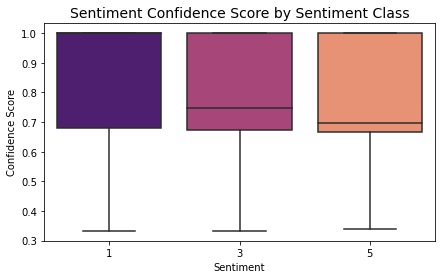

In [83]:
# Sentiment vs. Confidence Score
plt.figure(figsize=(7, 4))
sns.boxplot(x=df["sentiment"], y=df["sentiment:confidence"], palette="magma")
plt.title("Sentiment Confidence Score by Sentiment Class", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Confidence Score")
plt.show()

#### Observations:
- Confidence is relatively high across all sentiment categories.
- Wide spread in confidence scores.
- No significant differences between sentiment categories.

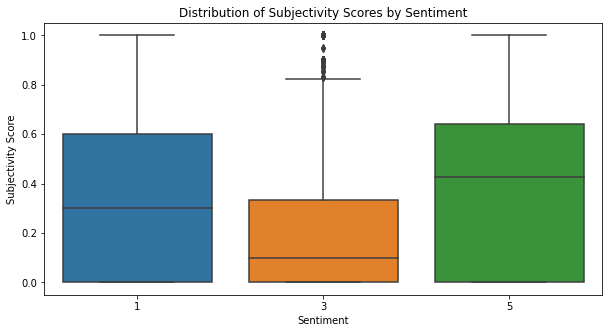

In [102]:
# Analysis of Sentiment Labels & Subjectivity
plt.figure(figsize=(10,5))
sns.boxplot(x=df["sentiment"], y=df["subjectivity"])
plt.xlabel("Sentiment")
plt.ylabel("Subjectivity Score")
plt.title("Distribution of Subjectivity Scores by Sentiment")
plt.show()

- **Negative and positive** tweets are often more **opinion-based**, while neutral tweets are more fact-based.


- This aligns with **expectations** — neutral tweets tend to state facts, whereas opinions (positive/negative) include emotional language.

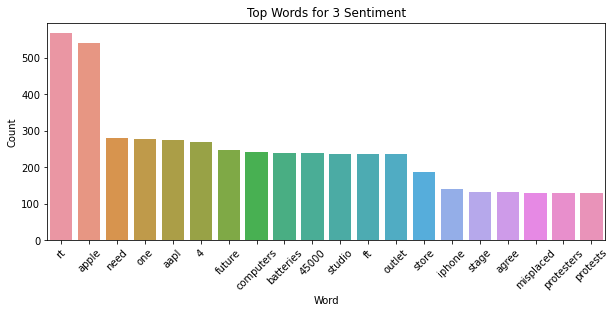

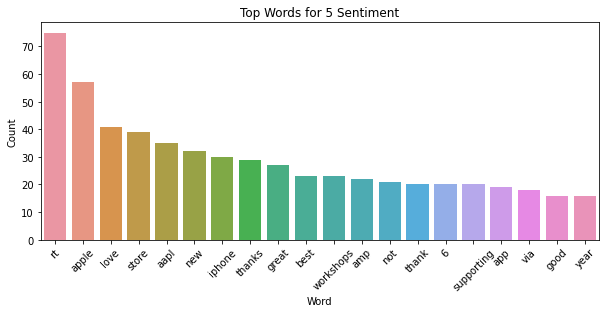

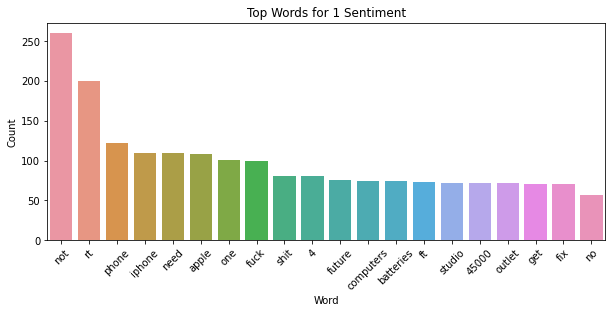

In [105]:
#Most Common Words by Sentiment

#Find top words appearing in positive, negative, and neutral tweets.

from collections import Counter

def get_top_words(df, sentiment_label, n=20):
    words = " ".join(df[df["sentiment"] == sentiment_label]["cleaned_text"].dropna()).split()
    word_freq = Counter(words).most_common(n)
    return pd.DataFrame(word_freq, columns=["Word", "Count"])

for sentiment in df["sentiment"].unique():
    plt.figure(figsize=(10, 4))
    sns.barplot(data=get_top_words(df, sentiment), x="Word", y="Count")
    plt.title(f"Top Words for {sentiment} Sentiment")
    plt.xticks(rotation=45)
    plt.show()

#### Observation:
- Negative (Score 1): Strong dissatisfaction, often about Apple products. Complaints include technical issues and unmet expectations. Filtering explicit words may help in sentiment analysis.
- Neutral (Score 3): Focused on Apple stock and company updates, mainly from investors or analysts. Less emotional content.
- Positive (Score 5): Praise for Apple products and service. Driven by satisfaction, gratitude, and excitement over new releases.

### Multivariate Analysis

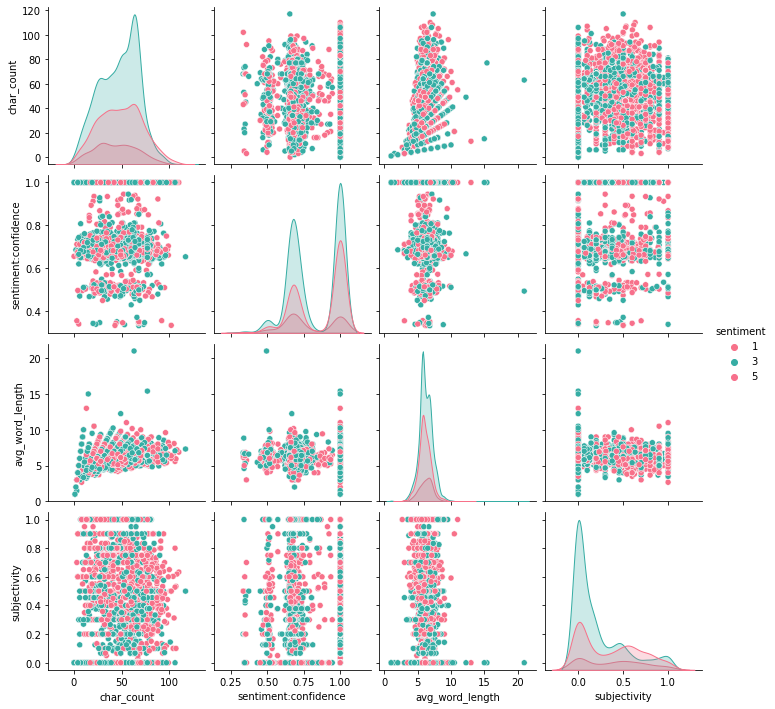

In [104]:
# Pairplot of Numerical Features
num_features = ["sentiment", "char_count", "sentiment:confidence","avg_word_length","subjectivity"]
sns.pairplot(df[num_features], hue="sentiment", palette="husl")
plt.show()

  #### Observations:
- Feature Distributions: Some features (e.g., sentiment confidence, subjectivity) show distinct patterns, but others (e.g., char count, avg word length) have overlapping distributions.
- Feature Relationships: Certain features may help distinguish sentiment classes, but heavy overlap suggests some features may not be strong predictors.
- Class Separation: If sentiment classes form clear clusters, the features are effective. Otherwise, more feature engineering may be needed.

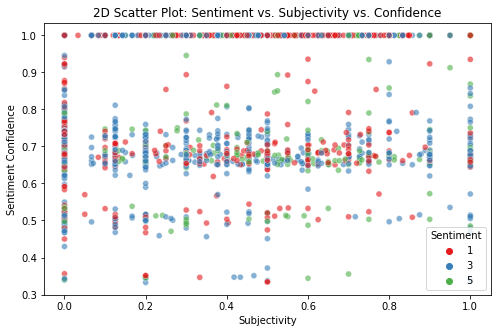

In [85]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, 
                x="subjectivity", 
                y="sentiment:confidence", 
                hue="sentiment", 
                alpha=0.6, 
                palette="Set1")
plt.title("2D Scatter Plot: Sentiment vs. Subjectivity vs. Confidence")
plt.xlabel("Subjectivity")
plt.ylabel("Sentiment Confidence")
plt.legend(title="Sentiment")
plt.show()

* The points appear scattered across the graph, indicating sentiment values are spread across different input features.
* The high density of blue and red points suggests that neutral and negative sentiments are more frequent in certain regions.
* Some sentiment clusters appear along the top and bottom, which might indicate edge cases or outliers.